In [27]:
from astropy.io import fits
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.wcs as wcs
import astropy.units as u
from astropy.convolution import convolve_fft
import numpy as np
from radio_beam import Beam
from reproject import reproject_interp
from matplotlib import pyplot as plt
from glob import glob 
from tqdm.auto import tqdm
import warnings 
from astropy.table import Table, hstack, join

warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
def get_hdu(rootdir, filename, hdu_id=0):
    filename_full = glob(rootdir+filename)[0]
    print(filename_full)
    if hdu_id == 'all':
        hdu = fits.open(filename_full)
    else:
        hdu = fits.open(filename_full)[hdu_id]
    return(hdu)

galaxy = 'ngc628c'
galaxy_muse = 'ngc0628'
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 
run_cleanup = True

narrowband_filter = 'f658n'
instrument_f555w  = 'acs'
instrument_f65Xn = 'acs'
instrument_f814w = 'acs'

# Take the anchored version, careful of name change in variable
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb        = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse            = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')
hdu_muse_ha         = hdu_muse['HA6562_FLUX']
hdu_muse_f555w      = get_hdu(rootdir, 'hst_contsub/hdu_muse_f555w.fits')
hdu_muse_f65Xn      = get_hdu(rootdir, 'hst_contsub/hdu_muse_%s.fits' %narrowband_filter)
hdu_muse_f814w      = get_hdu(rootdir, 'hst_contsub/hdu_muse_f814w.fits')
hdu_hst_f555w       = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w.fits')
hdu_hst_f65Xn       = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s.fits' %narrowband_filter)
hdu_hst_f814w       = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w.fits')
hdu_hst_ha          = get_hdu(rootdir, 'hst_contsub/hdu_hst_an_ha.fits')
hdu_hst_ha_noan     = get_hdu(rootdir, 'hst_contsub/hdu_hst_ha.fits')
hdu_hst_an_cont     = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_an_cont.fits' %narrowband_filter)
hdu_muse_contsub    = get_hdu(rootdir, 'hst_contsub/hdu_muse_%s_contsub.fits' %narrowband_filter)
hdu_hst_f555w_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w_smre.fits')
hdu_hst_f65Xn_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_smre.fits' %narrowband_filter)
hdu_hst_f814w_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w_smre.fits')
hdu_hst_f555w_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w_an.fits') 
hdu_hst_f65Xn_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_an.fits' %narrowband_filter) 
hdu_hst_f65Xn_anf   = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_anf.fits' %narrowband_filter) 
hdu_hst_f814w_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w_an.fits') 
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_hst_ha_crop     = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_crop.fits' %galaxy)
hdu_hst_ha_s_crop   = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_s_crop.fits' %galaxy)
hdu_hst_ha_si_crop  = get_hdu(rootdir,'hst_contsub/%s_hst_ha_si_crop.fits' %galaxy)
hdu_hst_ha_sic_crop = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_sic_crop.fits' %galaxy)

root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
sample_table_file = '%s/data_misc/sample_table/phangs_sample_table_v1p6.fits' %root_dir
muscat_table_file = '%s/data_misc/nebulae_catalogue/Nebulae_catalogue_v3.fits' %root_dir

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_an_ha.

In [3]:
# def get_smooth(hdu, initial_resolution, desired_resolution):
    
#     # Create a WCS object from the input HDU header
#     wcs_ = wcs.WCS(hdu.header)

#     # Calculate the pixel scale in degrees
#     pixscale = wcs.utils.proj_plane_pixel_area(wcs_.celestial) ** 0.5 * u.deg
#     print(f"[INFO] Pixel scale: {pixscale.to('arcsec'):.2f} arcsec")

#     # Define the initial and desired beams
#     initial_beam = Beam(initial_resolution)
#     desired_beam = Beam(desired_resolution)

#     print(f"[INFO] Initial Resolution: {initial_resolution.to('arcsec'):.2f} arcsec")
#     print(f"[INFO] Desired Resolution: {desired_resolution.to('arcsec'):.2f} arcsec")
    
#     # Create the convolution kernel
#     convolution_beam = (desired_resolution.to('arcsec')**2 - initial_resolution.to('arcsec')**2)**0.5
#     convolution_kernel = desired_beam.deconvolve(initial_beam).as_kernel(pixscale)
#     print(f"[INFO] Convolution kernel: {convolution_beam.to('arcsec'):.2f} arcsec")

#     # Convolve the image with the kernel to smooth it
#     print("[INFO] Performing image convolution...")
#     smoothed_data = convolve_fft(hdu.data, convolution_kernel, preserve_nan=True, allow_huge=True)
#     print("[INFO] Image convolution complete.")

#     output_hdu = fits.PrimaryHDU(np.array(smoothed_data, dtype=np.float32), hdu.header)

#     print("[INFO] Smoothing process completed.")
#     return(output_hdu)

# def get_regrid(hdu_input, hdu_template, output_filename=None, conserve_flux=True, order='bilinear'):

#     print("[INFO] Reprojecting the input image to match the template WCS...")

#     # Extract the WCS information from the input and template headers
#     wcs_input = wcs.WCS(hdu_input.header)
#     wcs_template = wcs.WCS(hdu_template.header)

#     # Calculate the pixel scale for input and template images
#     pixscale_input = wcs.utils.proj_plane_pixel_area(wcs_input.celestial)
#     pixscale_template = wcs.utils.proj_plane_pixel_area(wcs_template.celestial)

#     # Reproject the input image to match the template WCS
#     print("[INFO] Performing image reprojection...")
#     # data_output = reproject_interp(hdu_input, hdu_template.header, order=0, parallel=True)[0]
#     # data_output = reproject_interp(hdu_input, hdu_template.header, order=0)[0]
#     data_output = reproject_interp(hdu_input, hdu_template.header, order=order)[0]
#     hdu_output = fits.PrimaryHDU(data_output, hdu_template.header)
#     print("[INFO] Image reprojection complete.")

#     if conserve_flux:
#         # Scale the output data to conserve flux 
#         print(f"[INFO] Scaling the output data to conserve flux with factor {(pixscale_template / pixscale_input):.2f}")
#         hdu_output.data = hdu_output.data * (pixscale_template / pixscale_input)
#         hdu_output.data = np.array(hdu_output.data, dtype=np.float32)
#         print("[INFO] Flux scaling complete.")

#     print("[INFO] Reprojection process completed.")
#     return(hdu_output)

In [54]:
def get_museprops(galaxy, muscat_file):
    """
    Get properties from MUSE catalouge
    """

    print(f'[INFO] [get_MuseProps] Getting MUSE catalouge properties for {galaxy}...')
    muscat_table = Table.read(muscat_file)
    muscat_table = muscat_table[muscat_table['gal_name'] == galaxy.swapcase()]
    return(muscat_table)

muscat_table = get_museprops(galaxy_muse, muscat_table_file)
muscat_table.colnames

[INFO] [get_MuseProps] Getting MUSE catalouge properties for ngc0628...


['gal_name',
 'region_ID',
 'cen_x',
 'cen_y',
 'cen_ra',
 'cen_dec',
 'cen_x_geo',
 'cen_y_geo',
 'flag_edge',
 'flag_nearby',
 'flag_star',
 'deproj_dist',
 'deproj_phi',
 'region_area',
 'region_circ_rad',
 'HB4861_FLUX',
 'OIII5006_FLUX',
 'HA6562_FLUX',
 'NII6583_FLUX',
 'SII6716_FLUX',
 'SII6730_FLUX',
 'SIII9068_FLUX',
 'OI6300_FLUX',
 'NII5754_FLUX',
 'HEI5875_FLUX',
 'SIII6312_FLUX',
 'OI6363_FLUX',
 'OII7319_FLUX',
 'OII7330_FLUX',
 'HB4861_FLUX_ERR',
 'OIII5006_FLUX_ERR',
 'HA6562_FLUX_ERR',
 'NII6583_FLUX_ERR',
 'SII6716_FLUX_ERR',
 'SII6730_FLUX_ERR',
 'SIII9068_FLUX_ERR',
 'OI6300_FLUX_ERR',
 'NII5754_FLUX_ERR',
 'HEI5875_FLUX_ERR',
 'SIII6312_FLUX_ERR',
 'OI6363_FLUX_ERR',
 'OII7319_FLUX_ERR',
 'OII7330_FLUX_ERR',
 'HA6562_SIGMA',
 'NII6583_SIGMA',
 'OIII5006_SIGMA',
 'HA6562_VEL',
 'NII6583_VEL',
 'OIII5006_VEL',
 'HA6562_SIGMA_ERR',
 'NII6583_SIGMA_ERR',
 'OIII5006_SIGMA_ERR',
 'HA6562_VEL_ERR',
 'NII6583_VEL_ERR',
 'OIII5006_VEL_ERR',
 'HB4861_FLUX_CORR',
 'OIII5006_F

In [5]:
data_output = reproject_interp(hdu_muse_neb, hdu_hst_ha_crop.header, order='nearest-neighbor')[0]
hdu_muse_neb_re = fits.PrimaryHDU(data_output, hdu_hst_ha_crop.header)

In [13]:
def get_flux_nebs(hdu1, hdu2, hdu_neb1, hdu_neb2, filter='', make_plots=True):

    data_neb = hdu_neb1.data.copy()
    ids1 = np.unique(data_neb)
    ids1.sort()
    ids1 = list(ids1)
    ids1.remove(-1)

    data_neb = hdu_neb2.data.copy()
    ids2 = np.unique(data_neb)
    ids2.sort()
    ids2 = list(ids2)
    ids2.remove(-1)

    ids = []
    for id in tqdm(np.unique(np.hstack([ids1, ids2]))):
        if (id in ids1) &  (id in ids2): 
            ids += [id]

    flux_1 = np.ones(len(ids))
    flux_2 = np.ones(len(ids))
    
    for i in tqdm(range(len(ids))): 

        id = ids[i]

        mask1 = hdu_neb1.data == id
        mask2 = hdu_neb2.data == id

        flux_1[i] = np.nansum(hdu1.data[mask1])
        flux_2[i] = np.nansum(hdu2.data[mask2])
        
    return(flux_1, flux_2, ids)

flux_1, flux_2, ids = get_flux_nebs(hdu_muse_ha, hdu_hst_ha_crop, hdu_muse_neb, hdu_muse_neb_re)

  0%|          | 0/2870 [00:00<?, ?it/s]

  0%|          | 0/2785 [00:00<?, ?it/s]

In [45]:
unit = muscat_table['HA6562_FLUX'].unit
data = [ids, flux_1*unit, flux_2*unit, (flux_2*unit)/(flux_1*unit)]
names = ['region_ID', 'flux_muse', 'flux_hst', 'flux_hst/muse']
table_neb = Table(data=data, names=names)

muscat_table_joined = join(table_neb, muscat_table, keys='region_ID')

In [46]:
table_neb

region_ID,flux_muse,flux_hst,flux_hst/muse
,1e-20 erg / (s cm2),1e-20 erg / (s cm2),
float64,float64,float64,float64
0.0,4218.56397763454,6943.3955078125,1.645914473414208
1.0,5522.431210201424,11796.44921875,2.136097086543834
2.0,553835.7082769829,589956.75,1.0652197776040695
3.0,51284.128665037635,44210.98046875,0.8620791972018105
4.0,80592.81774301818,93678.4921875,1.1623677495208986
5.0,120878.95924304113,120277.546875,0.9950246728478864
6.0,23911.099328846238,34004.56640625,1.4221247604967728
7.0,119420.52485451907,132940.09375,1.113209759477701


In [47]:
muscat_table_joined

region_ID,flux_muse,flux_hst,flux_hst/muse,gal_name,cen_x,cen_y,cen_ra,cen_dec,cen_x_geo,cen_y_geo,flag_edge,flag_nearby,flag_star,deproj_dist,deproj_phi,region_area,region_circ_rad,HB4861_FLUX,OIII5006_FLUX,HA6562_FLUX,NII6583_FLUX,SII6716_FLUX,SII6730_FLUX,SIII9068_FLUX,OI6300_FLUX,NII5754_FLUX,HEI5875_FLUX,SIII6312_FLUX,OI6363_FLUX,OII7319_FLUX,OII7330_FLUX,HB4861_FLUX_ERR,OIII5006_FLUX_ERR,HA6562_FLUX_ERR,NII6583_FLUX_ERR,SII6716_FLUX_ERR,SII6730_FLUX_ERR,SIII9068_FLUX_ERR,OI6300_FLUX_ERR,NII5754_FLUX_ERR,HEI5875_FLUX_ERR,SIII6312_FLUX_ERR,OI6363_FLUX_ERR,OII7319_FLUX_ERR,OII7330_FLUX_ERR,HA6562_SIGMA,NII6583_SIGMA,OIII5006_SIGMA,HA6562_VEL,NII6583_VEL,OIII5006_VEL,HA6562_SIGMA_ERR,NII6583_SIGMA_ERR,OIII5006_SIGMA_ERR,HA6562_VEL_ERR,NII6583_VEL_ERR,OIII5006_VEL_ERR,HB4861_FLUX_CORR,OIII5006_FLUX_CORR,HA6562_FLUX_CORR,NII6583_FLUX_CORR,SII6716_FLUX_CORR,SII6730_FLUX_CORR,SIII9068_FLUX_CORR,OI6300_FLUX_CORR,NII5754_FLUX_CORR,HEI5875_FLUX_CORR,SIII6312_FLUX_CORR,OI6363_FLUX_CORR,OII7319_FLUX_CORR,OII7330_FLUX_CORR,HB4861_FLUX_CORR_ERR,OIII5006_FLUX_CORR_ERR,HA6562_FLUX_CORR_ERR,NII6583_FLUX_CORR_ERR,SII6716_FLUX_CORR_ERR,SII6730_FLUX_CORR_ERR,SIII9068_FLUX_CORR_ERR,OI6300_FLUX_CORR_ERR,NII5754_FLUX_CORR_ERR,HEI5875_FLUX_CORR_ERR,SIII6312_FLUX_CORR_ERR,OI6363_FLUX_CORR_ERR,OII7319_FLUX_CORR_ERR,OII7330_FLUX_CORR_ERR,EBV,EBV_ERR,met_scal,met_scal_err,logq_D91,logq_D91_err,t_N2,t_S3,t_N2_err,t_S3_err,BPT_NII,BPT_SII,BPT_OI,LOG_SIGMA_SFR_CHAB,LOG_SIGMA_STMASS_CHAB,5thNN_dist,NN_number,Environment,r_R25,r_reff,Lum_HA6562_CORR,Delta_met_scal,pc_per_pixel,EW_HA6562_raw,EW_HA6562_raw_ERR,EW_HB4861_raw,EW_HB4861_raw_ERR,EW_HA6562_fit,EW_HA6562_fit_ERR,EW_HB4861_fit,EW_HB4861_fit_ERR,EW_HA6562_bgcorr,EW_HA6562_bgcorr_ERR,EW_HB4861_bgcorr,EW_HB4861_bgcorr_ERR,HII_class_v2,HII_class_v3
,1e-20 erg / (s cm2),1e-20 erg / (s cm2),,,pix,pix,deg,deg,pix,pix,,,,arcsec,rad,pix2,arcsec,1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),mag,mag,,,,,K,K,K,K,,,,solMass / (yr kpc2),solMass / kpc2,pc,,,,,erg / s,,pc,,,,,Angstrom,Angstrom,Angstrom,Angstrom,Angstrom,Angstrom,Angstrom,Angstrom,,
float64,float64,float64,float64,bytes32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float6

In [48]:
muscat_table

gal_name,region_ID,cen_x,cen_y,cen_ra,cen_dec,cen_x_geo,cen_y_geo,flag_edge,flag_nearby,flag_star,deproj_dist,deproj_phi,region_area,region_circ_rad,HB4861_FLUX,OIII5006_FLUX,HA6562_FLUX,NII6583_FLUX,SII6716_FLUX,SII6730_FLUX,SIII9068_FLUX,OI6300_FLUX,NII5754_FLUX,HEI5875_FLUX,SIII6312_FLUX,OI6363_FLUX,OII7319_FLUX,OII7330_FLUX,HB4861_FLUX_ERR,OIII5006_FLUX_ERR,HA6562_FLUX_ERR,NII6583_FLUX_ERR,SII6716_FLUX_ERR,SII6730_FLUX_ERR,SIII9068_FLUX_ERR,OI6300_FLUX_ERR,NII5754_FLUX_ERR,HEI5875_FLUX_ERR,SIII6312_FLUX_ERR,OI6363_FLUX_ERR,OII7319_FLUX_ERR,OII7330_FLUX_ERR,HA6562_SIGMA,NII6583_SIGMA,OIII5006_SIGMA,HA6562_VEL,NII6583_VEL,OIII5006_VEL,HA6562_SIGMA_ERR,NII6583_SIGMA_ERR,OIII5006_SIGMA_ERR,HA6562_VEL_ERR,NII6583_VEL_ERR,OIII5006_VEL_ERR,HB4861_FLUX_CORR,OIII5006_FLUX_CORR,HA6562_FLUX_CORR,NII6583_FLUX_CORR,SII6716_FLUX_CORR,SII6730_FLUX_CORR,SIII9068_FLUX_CORR,OI6300_FLUX_CORR,NII5754_FLUX_CORR,HEI5875_FLUX_CORR,SIII6312_FLUX_CORR,OI6363_FLUX_CORR,OII7319_FLUX_CORR,OII7330_FLUX_CORR,HB4861_FLUX_CORR_ERR,OIII5006_FLUX_CORR_ERR,HA6562_FLUX_CORR_ERR,NII6583_FLUX_CORR_ERR,SII6716_FLUX_CORR_ERR,SII6730_FLUX_CORR_ERR,SIII9068_FLUX_CORR_ERR,OI6300_FLUX_CORR_ERR,NII5754_FLUX_CORR_ERR,HEI5875_FLUX_CORR_ERR,SIII6312_FLUX_CORR_ERR,OI6363_FLUX_CORR_ERR,OII7319_FLUX_CORR_ERR,OII7330_FLUX_CORR_ERR,EBV,EBV_ERR,met_scal,met_scal_err,logq_D91,logq_D91_err,t_N2,t_S3,t_N2_err,t_S3_err,BPT_NII,BPT_SII,BPT_OI,LOG_SIGMA_SFR_CHAB,LOG_SIGMA_STMASS_CHAB,5thNN_dist,NN_number,Environment,r_R25,r_reff,Lum_HA6562_CORR,Delta_met_scal,pc_per_pixel,EW_HA6562_raw,EW_HA6562_raw_ERR,EW_HB4861_raw,EW_HB4861_raw_ERR,EW_HA6562_fit,EW_HA6562_fit_ERR,EW_HB4861_fit,EW_HB4861_fit_ERR,EW_HA6562_bgcorr,EW_HA6562_bgcorr_ERR,EW_HB4861_bgcorr,EW_HB4861_bgcorr_ERR,HII_class_v2,HII_class_v3
,,pix,pix,deg,deg,pix,pix,,,,arcsec,rad,pix2,arcsec,1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),mag,mag,,,,,K,K,K,K,,,,solMass / (yr kpc2),solMass / kpc2,pc,,,,,erg / s,,pc,,,,,Angstrom,Angstrom,Angstrom,Angstrom,Angstrom,Angstrom,Angstrom,Angstrom,,
bytes32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
NGC0628,0.0,839.535640010673

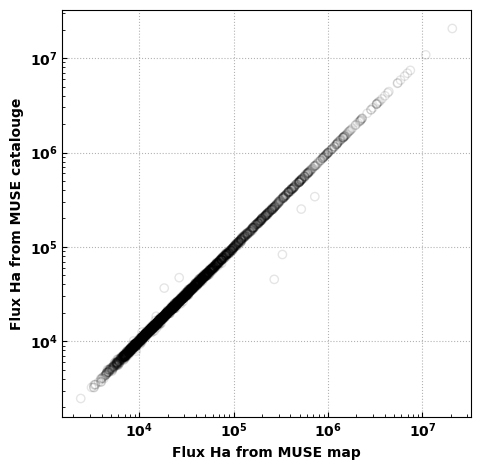

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')

ax1.scatter(muscat_table_joined['flux_muse'], muscat_table_joined['HA6562_FLUX'], fc='none', ec='k', alpha=0.1)

ax1.set_xlabel('Flux Ha from MUSE map')
ax1.set_ylabel('Flux Ha from MUSE catalouge')

ax1.set_xscale('log')
ax1.set_yscale('log')

plt.grid(True, alpha=0.3, ls=':', color='black')
plt.tight_layout()

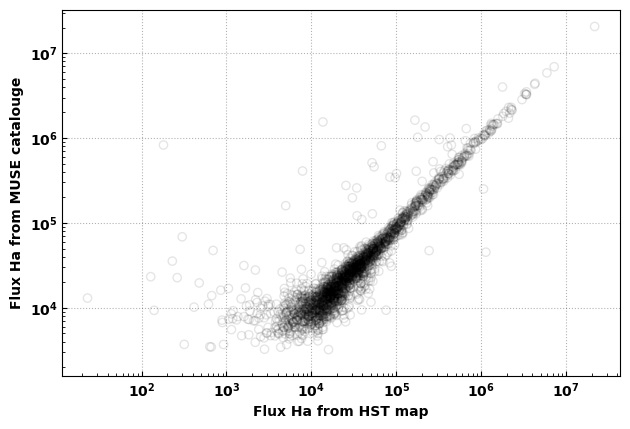

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')

ax1.scatter(muscat_table_joined['flux_hst'], muscat_table_joined['HA6562_FLUX'], fc='none', ec='k', alpha=0.1)

ax1.set_xlabel('Flux Ha from HST map')
ax1.set_ylabel('Flux Ha from MUSE catalouge')

ax1.set_xscale('log')
ax1.set_yscale('log')

plt.grid(True, alpha=0.3, ls=':', color='black')
plt.tight_layout()

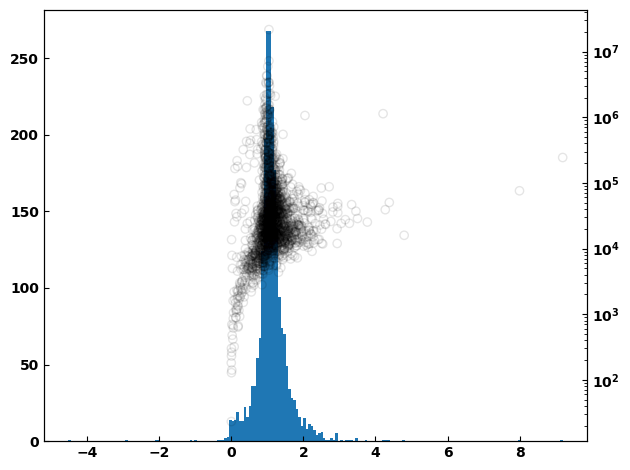

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ratio = muscat_table_joined['flux_hst/muse']

_ = ax1.hist(ratio[ratio!=0], bins=200)
ax2.scatter(ratio[ratio!=0], flux_2[flux_2!=0], fc='none', ec='k', alpha=0.1)

ax2.set_yscale('log')

plt.tight_layout()

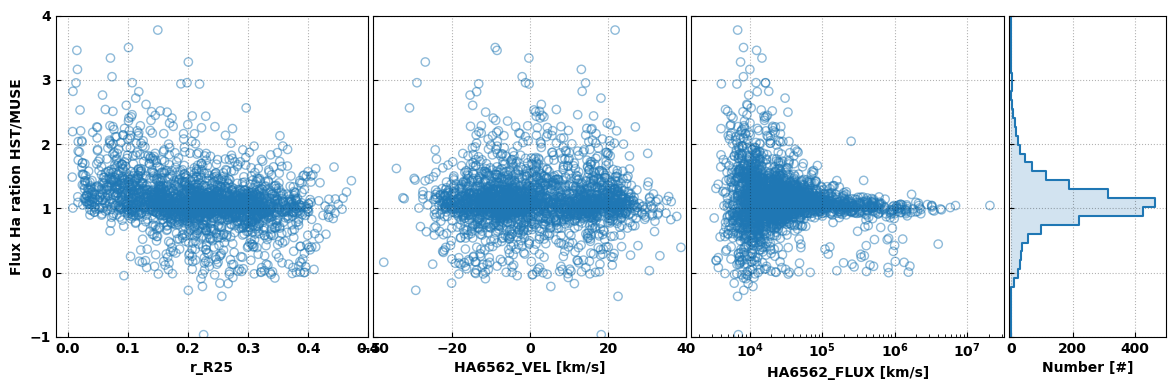

In [162]:
fig = plt.figure(figsize=(12,4))

from matplotlib import gridspec
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,0.5]) 

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

# ax1 = fig.add_subplot(141)
# ax2 = fig.add_subplot(142)
# ax3 = fig.add_subplot(143)
# ax4 = fig.add_subplot(144)

ratio = muscat_table_joined['flux_hst/muse']
mask = ratio!=0

ax1.scatter(muscat_table_joined['r_R25'][mask], ratio[mask], fc='none', ec='C0', alpha=0.5)
ax2.scatter(muscat_table_joined['HA6562_VEL'][mask], ratio[mask], fc='none', ec='C0', alpha=0.5)
ax3.scatter(muscat_table_joined['HA6562_FLUX'][mask], ratio[mask], fc='none', ec='C0', alpha=0.5)

data_hist, bins_edges = np.histogram(ratio[mask], bins=100)
data_hist[[0,-1]] = [0,0]
bins_center = np.linspace(bins_edges.min(), bins_edges.max(), len(bins_edges)-1)

ax4.plot(data_hist, bins_center, ds='steps-mid')
ax4.fill_between(data_hist, bins_center, y2=0, step="mid", alpha=0.2, zorder=0)

ax1.set_ylabel('Flux Ha ration HST/MUSE')
ax1.set_xlabel('r_R25')
ax2.set_xlabel('HA6562_VEL [km/s]')
ax3.set_xlabel('HA6562_FLUX [km/s]')
ax4.set_xlabel('Number [#]')

for ax in [ax1,ax2,ax3,ax4]:

    ax.set_ylim(-1, 4)
    ax.grid(True, alpha=0.3, ls=':', color='black')

ax1.set_xlim([-.02, 0.5])
ax2.set_xlim([-40, 40])
ax4.set_xlim([-5, 5e2])

ax3.set_xscale('log')
# ax4.set_xscale('log')

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])

plt.tight_layout(h_pad=0, w_pad=-0.75)